# Concepts Recap with Keras

In [ ]:
"""
Building Blocks of CNN:
	1. Convolutional Layers - filters, feature maps, pooling layers
	2. Pooling Layers 
	3. Fully-Connected Layers 

Convolutional Neural Networks Best Practices
With the building blocks for a convolutional neural network and how the layers 
work together, we can review best practices to consider when applying them.

	- Input Receptive Field Dimensions: The default is 2D for images, but could be 
  1D such as for words in a sentence or 3D for video that adds a time dimension.

	- Receptive Field Size: The patch should be as small as possible, but large 
  enough to see features in the input data. It is common to use 3 × 3 on small 
  images and 5 × 5 or 7 × 7 and more on larger image sizes.

	- Stride Width: Use the default stride of 1. It is easy to understand and you 
  don’t need padding to handle the receptive field falling off the edge of your 
  images. This could be increased to 2 or larger for larger images.

	- Number of Filters: Filters are the feature detectors. Generally fewer filters 
  are used at the input layer and increasingly more filters used at deeper layers.

	- Padding: Set to zero and called zero padding when reading non-input data. 
  This is useful when you cannot or do not want to standardize input image sizes 
  or when you want to use receptive field and stride sizes that do not neatly 
  divide up the input image size.

	- Pooling: Pooling is a destructive or generalization process to reduce 
  overfitting. Receptive field size is almost always set to 2 × 2 with a stride 
  of 2 to discard 75% of the activations from the output of the previous layer.

	- Data Preparation: Consider standardizing input data, both the dimensions 
  of the images and pixel values.

	- Pattern Architecture: It is common to pattern the layers in your network 
  architecture. This might be one, two or some number of convolutional layers 
  followed by a pooling layer. This structure can then be repeated one or more 
  times. Finally, fully connected layers are often only used at the output end 
  and may be stacked one, two or more deep.
  
	- Dropout: CNNs have a habit of overfitting, even with pooling layers. 
  Dropout should be used such as between fully connected layers and perhaps 
  after pooling layers.
"""

### Handwritten Digit recognition

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

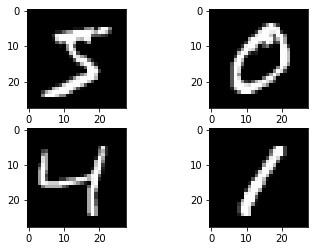

In [1]:
""" Demonstration of capabilities of deep learning is the object recognition.
The simple 'hello world' program with any programming language, for ML and DL,
is the MNIST dataset for handwritten digit recognition.
1. Develop a DL model near state-of-art performance for the MNIST dr task. Use
   Python/Keras libraries 
2. Implement and evaluate the convolutional neural network 
3. Use GPU and not CPU to speed up the computation 

MNIST dataset is constructed fro scanned images and opened source. The image of
digits were taken from a variety of scanned documents, normalized and centered. 
Excellent dataset for evaluating models in order to allow developers to focus 
on ML snd not spent much time on data preparation. 
Each split is 28x28 - 784 pixels total. A standard split is used to evaluate and 
compare models, where 60,000 images are used to train a model and separate a set 
of 10,000 images used to test it. 
10 classes used to predict (0-9 digits), with results reported as prediction 
error with inverted calssification for accuracy 
Criteria:
  - excellent results achieve a prediction error of less than 1%
  - state-of-art results predition error of approx. 0.2% (achievable w/ CNN)

Dataset as package in size of 15 megabytes 
~./keras/datasets/mnist.pkl.gz 
Download/load the dataset with keras functions 
"""
from keras.datasets import mnist
import matplotlib.pyplot as plt 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
""" plot 4 images as gray scale """ 
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
X_train.shape, y_train.shape, X_test.shape, y_train.shape

In [2]:
""" baseline model with multilayer perceptrons """ 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils 
""" load the data """ 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
""" flatten 28x28 images to a 784 vector for each image """ 
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
""" normalize inputs from 0-255 to 0-1 """ 
X_train = X_train / 255
X_test = X_test / 255 
""" output is an integer from 0 to 9. this is a multiclass classification 
as such as best practice, use one hot encoding of the class values transforming
the vector of class integers into a binary matrix. 
use built-in helper from keras np.utils.to.categorical() function """ 
""" one hot-encoding """ 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
""" baseline model, define and compile """ 
def baseline_model():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy'])
  return model 

""" multilayer perceptrons 
    visible layer (784 inputs) 
      |
    hidden layer (784 inputs) 
      |
    output layer (10 outputs/classes) """

""" build the model """ 
model = baseline_model()
""" fit the model """ 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, 
          batch_size=200, verbose=2)
""" final evaluation """ 
scores = model.evaluate(X_test, y_test, verbose=0)
print('baseline error: % 2f%%' % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - loss: 0.2780 - accuracy: 0.9211 - val_loss: 0.1397 - val_accuracy: 0.9597 - 6s/epoch - 21ms/step
Epoch 2/10
300/300 - 6s - loss: 0.1120 - accuracy: 0.9673 - val_loss: 0.0942 - val_accuracy: 0.9725 - 6s/epoch - 21ms/step
Epoch 3/10
300/300 - 6s - loss: 0.0722 - accuracy: 0.9792 - val_loss: 0.0805 - val_accuracy: 0.9759 - 6s/epoch - 18ms/step
Epoch 4/10
300/300 - 8s - loss: 0.0523 - accuracy: 0.9845 - val_loss: 0.0631 - val_accuracy: 0.9812 - 8s/epoch - 26ms/step
Epoch 5/10
300/300 - 8s - loss: 0.0374 - accuracy: 0.9896 - val_loss: 0.0641 - val_accuracy: 0.9795 - 8s/epoch - 28ms/step
Epoch 6/10
300/300 - 6s - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.0623 - val_accuracy: 0.9807 - 6s/epoch - 21ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.0593 - val_accuracy: 0.9819 - 5s/epoch - 17ms/step
Epoch 8/10
300/300 - 6s - loss: 0.0151 - accuracy: 0.9964 - val_loss: 0.0573 - val_accuracy: 0.9822 - 6s/epoch - 21ms/step
Epoch 9/10
300/3

In [3]:
""" Convolutional Neural Network template/structure """
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 
""" load the data """ 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
""" flatten 28x28 images to a 784 vector for each image """ 
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
""" normalize inputs from 0-255 to 0-1 """ 
X_train = X_train / 255
X_test = X_test / 255 
""" one hot-encoding """ 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
""" CNN structure
    visible layer (784 inputs = 1x28x28) 
    convolutional layer (32 maps, 5x5) 
    max pooling layer (4 (2x2)) 
    dropout layer (20%)
    flatten layer 
    hidden layer (128 neurons)
    output layer (10 outputs)
"""
""" CNN model, define and compile """ 
def baseline_model_cnn():
  model = Sequential()
  model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy'])
  return model 
model = baseline_model_cnn()
""" fit the model """ 
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, 
          batch_size=200, verbose=2)
""" final evaluation """ 
scores = model.evaluate(X_test, y_test, verbose=0)
print('CNN error: % 2f%%' % (100-scores[1]*100))

Epoch 1/10
300/300 - 49s - loss: 0.2393 - accuracy: 0.9318 - val_loss: 0.0796 - val_accuracy: 0.9752 - 49s/epoch - 163ms/step
Epoch 2/10
300/300 - 44s - loss: 0.0734 - accuracy: 0.9782 - val_loss: 0.0469 - val_accuracy: 0.9841 - 44s/epoch - 146ms/step
Epoch 3/10
300/300 - 41s - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0441 - val_accuracy: 0.9860 - 41s/epoch - 136ms/step
Epoch 4/10
300/300 - 39s - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0345 - val_accuracy: 0.9883 - 39s/epoch - 130ms/step
Epoch 5/10
300/300 - 44s - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0334 - val_accuracy: 0.9874 - 44s/epoch - 147ms/step
Epoch 6/10
300/300 - 39s - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0319 - val_accuracy: 0.9886 - 39s/epoch - 130ms/step
Epoch 7/10
300/300 - 35s - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0314 - val_accuracy: 0.9890 - 35s/epoch - 118ms/step
Epoch 8/10
300/300 - 37s - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0293 - val_accuracy: 0.9895 - 37s/epoch - 123

### Larger CNN for MNIST

In [4]:
""" CNN structure (architecture)
    visible layer (784 inputs = 1x28x28) 
    convolutional layer (30 maps, 5x5) 
    max pooling layer (4 (2x2)) 
    convolutional layer (15 maps, 3x3) 
    max pooling layer (4 (2x2)) 
    dropout layer (20%)
    hidden layer (128 neurons)
    hidden layer (50 neurons)
    output layer (10 outputs)
"""
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 
""" load the data """ 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
""" flatten 28x28 images to a 784 vector for each image """ 
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
""" normalize inputs from 0-255 to 0-1 """ 
X_train = X_train / 255
X_test = X_test / 255 
""" one hot-encoding """ 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
""" CNN model, define and compile """ 
def large_model_cnn():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(15, (3,3), activation='relu')) 
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', 
                metrics=['accuracy'])
  return model 
model = large_model_cnn()
""" fit the model """ 
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, 
          batch_size=200, verbose=2)
""" final evaluation """ 
scores = model.evaluate(X_test, y_test, verbose=0)
print('Large CNN error: % 2f%%' % (100-scores[1]*100))

Epoch 1/10
300/300 - 44s - loss: 0.3710 - accuracy: 0.8867 - val_loss: 0.0798 - val_accuracy: 0.9747 - 44s/epoch - 146ms/step
Epoch 2/10
300/300 - 39s - loss: 0.0932 - accuracy: 0.9718 - val_loss: 0.0486 - val_accuracy: 0.9850 - 39s/epoch - 131ms/step
Epoch 3/10
300/300 - 40s - loss: 0.0679 - accuracy: 0.9787 - val_loss: 0.0447 - val_accuracy: 0.9857 - 40s/epoch - 135ms/step
Epoch 4/10
300/300 - 42s - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0376 - val_accuracy: 0.9871 - 42s/epoch - 140ms/step
Epoch 5/10
300/300 - 42s - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0303 - val_accuracy: 0.9895 - 42s/epoch - 140ms/step
Epoch 6/10
300/300 - 40s - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0289 - val_accuracy: 0.9916 - 40s/epoch - 135ms/step
Epoch 7/10
300/300 - 40s - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0272 - val_accuracy: 0.9908 - 40s/epoch - 133ms/step
Epoch 8/10
300/300 - 39s - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0257 - val_accuracy: 0.9917 - 39s/epoch - 131

### simple CNN model for CIFAR-10

In [ ]:
""" CNN structure 
  1. CNN input layer, 32 feature maps with size 3x3, a rectifier activation Fn,
     and a weight constraint of max norm set to 3 
  2. Dropout set to 20% 
  3. CNN layer, 32 feature maps with size of 3x3, a rectifier activation Fn,
     and a weight constraint of max norm set to 3 
  4. Max Pool layer with size 2x2 
  5. Flatten layer
  6. Fully connected layer with 512 units and rectifier activation Fn
  7. Dropout set to 50% 
  8. Fully connected output layer with 10 units and softmax activation function
A logarithmic loss function is used with stochastic grdient descent configured
with a large momentum and weight decay, starting with learning rate (lr) of 0.01

    Visible Layer (3x32x32)
    Convolutional Layer (32 maps, 3x3)
    Dropout Layer (20%)
    Convolutional Layer(32 aps 3x3)
    Max Pooling Layer (2x2)
    Hidden Layer (512 neurons)
    Dropout Layer (20%)
    Output Layer (10 outputs)

"""
from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.constraints import maxnorm
from keras.optimizers import SGD 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils
""" load data """
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
""" normalize inputs from 0-255 to 0.0-1.0 """ 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0 
X_test = X_test / 255.0 
""" one hot encode outputs """ 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
""" create the CNN model """ 
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), padding='same', 
          activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', 
          activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
""" compile model """ 
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
""" fit the model """ 
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: % 2f%%' % (scores[1]*100))

170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 512)             

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Trainable params: 4,210,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1563/1563 [==============================] - 295s 188ms/step - loss: 1.6920 - accuracy: 0.3876 - val_loss: 1.3968 - val_accuracy: 0.4923
Epoch 2/25
1563/1563 [==============================] - 284s 182ms/step - loss: 1.3480 - accuracy: 0.5125 - val_loss: 1.2070 - val_accuracy: 0.5685
Epoch 3/25
1563/1563 [==============================] - 274s 175ms/step - loss: 1.1852 - accuracy: 0.5775 - val_loss: 1.1050 - val_accuracy: 0.6057
Epoch 4/25
1563/1563 [==============================] - 272s 174ms/step - loss: 1.0543 - accuracy: 0.6270 - val_loss: 1.0461 - val_accuracy: 0.6298
Epoch 5/25
1563/1563 [==============================] - 286s 183ms/step - loss: 0.9516 - accuracy: 0.6615 - val_loss: 0.9955 - val_accuracy: 0.6526
Epoch 6/25
1221/1563 [======================>.......] - ETA: 57s - loss: 0.8589 - accuracy: 0.6953

### Extensions to improve the model performance

In [ ]:
""" example with Larger CNN for CIFAR-10 

Larger/Deeper CNN means adding additional round of convolutions with large 
feature maps, using same pattern of Convolutional, Dropout, Convolutional Max 
and Pooling layers. Repeat the pattern 3 times with 32, 64, and 128 feature maps.
The effect will be an increasing number of feature maps with smaller size given 
the max pooling layers. An additional and larger Dense layer will be used as the 
output end of the networkin an attempt to better translate the large number 
feature maps to class values.
Network architecture as follows: 
  1. Convolutional input layer, 32 feature maps with a size of 3x3 and a 
     rectifier activation function
  2. Dropout layer at 20% 
  3. Convolutional layer, 32 feature maps with a size of 3x3 and a rectifier 
     activation function
  4. Max pool layer with size 2x2 
  5. Convolutional layer, 64 feature maps with a size of 3x3 and a rectifier 
     activation function
  6. Dropout layer at 20% 
  7. Convolutional layer, 64 feature maps with a size of 3x3 and a rectifier 
     activation function
  8. Max pool layer with size 2x2 
  9. Convolutional layer, 128 feature maps with a size of 3x3 and a rectifier 
     activation function
  10. Dropout layer at 20% 
  11. Convolutional layer, 128 feature maps with a size of 3x3 and a rectifier 
     activation function  
  12. Max pool layer with size 2x2 
  13. Flatten layer at 20% 
  14. Dropout layer at 20%
  15. Fully connected layer with 1024 units and a rectifier activation function
  16. Dropput layer at 20%
  17. Fully connected layer with 512 units and a rectifier activation function 
  18. Dropout layer at 20% 
  19. Fully connected output layer with 10 units and a softmax activation function
Fit and evaluate the model using same procedure as above, with smae epochs, and
a larger batch size of 64. 

"""
from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.constraints import maxnorm
from keras.optimizers import SGD 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils
""" load data """
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
""" normalize inputs from 0-255 to 0.0-1.0 """ 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0 
X_test = X_test / 255.0 
""" one hot encode outputs """ 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
""" create the CNN model """ 
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), 
                 padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
""" compile model """ 
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
""" fit the model """ 
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=epochs, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: % 2f%%' % (scores[1]*100))

""" Accuracy improved by 10 points """ 

In [ ]:
""" extend upon the model and improve the performance 

1. Train for more epochs - it is common for CNNs to use hundred or thousands of 
   epochs. Performance gains can be achieved by significantly raising the number 
   of training epochs.
2. Image data augmentation - the objects in the image vary in their position. 
   Use data augmentation to boost model performance. Methods such as 
   standardization and random shifts and horizontal image flips may be beneficial.
3. Deeper network topology - larger netorks could be designed for this problem. 
   It involves more feature maps in the input and less aggresive pooling. 
   Standard CNN topologies (as above) are useful for adoption and evaluation
"""